## Loading and Cleaning Data

In [1]:
#Importing all required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Finding the most suitable encoding for the dataset
import chardet
rawdata = open('loan.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

utf-8


In [2]:
#Loading the input dataset into a dataframe using the above encoding
df = pd.read_csv("loan.csv", encoding = 'UTF-8')

In [4]:
#Using the 'set_option' function to display the maximum number of columns
pd.set_option('display.max_columns', 150)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 30.0+ MB


In [7]:
#Finding null values
df.isnull().sum().head(15)

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2459
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
dtype: int64

In [8]:
#Checking the maximum number of null or missing values by sorting the count in descending order
df.isnull().sum().sort_values(ascending=False).head(30)

total_il_high_credit_limit     39717
mo_sin_old_rev_tl_op           39717
bc_util                        39717
bc_open_to_buy                 39717
avg_cur_bal                    39717
acc_open_past_24mths           39717
inq_last_12m                   39717
total_cu_tl                    39717
inq_fi                         39717
total_rev_hi_lim               39717
all_util                       39717
max_bal_bc                     39717
open_rv_24m                    39717
open_rv_12m                    39717
il_util                        39717
total_bal_il                   39717
mths_since_rcnt_il             39717
open_il_24m                    39717
open_il_12m                    39717
open_il_6m                     39717
open_acc_6m                    39717
tot_cur_bal                    39717
tot_coll_amt                   39717
total_bc_limit                 39717
dti_joint                      39717
annual_inc_joint               39717
mths_since_last_major_derog    39717
m

In [9]:
#Finding percent of missing values
round(100*(df.isnull().sum().sort_values(ascending=False).head(60)/len(df.index)), 2)

total_il_high_credit_limit        100.00
mo_sin_old_rev_tl_op              100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
total_bc_limit                    100.00
dti_joint       

In [10]:
#Instead of dropping those 57 null value columns, we have selected the remaining 54 columns
df1 =  df[['id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade',
'emp_title','emp_length','home_ownership','annual_inc','verification_status','issue_d','loan_status','pymnt_plan','url',
'purpose','title','zip_code','addr_state','dti','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal',
'revol_util','total_acc','initial_list_status','delinq_amnt','acc_now_delinq','delinq_2yrs','out_prncp','out_prncp_inv',
'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','policy_code','application_type','pub_rec_bankruptcies','tax_liens',
'collections_12_mths_ex_med','chargeoff_within_12_mths','desc']]

In [11]:
#Finding unique values for columns
df1.nunique().sort_values()

tax_liens                         1
collections_12_mths_ex_med        1
policy_code                       1
application_type                  1
acc_now_delinq                    1
delinq_amnt                       1
pymnt_plan                        1
chargeoff_within_12_mths          1
initial_list_status               1
term                              2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [12]:
#Dropping columns with unique value as 1, since it wouldn't help in the analysis.
df1 = df1.drop(['pymnt_plan','initial_list_status','policy_code','application_type','tax_liens',
                'collections_12_mths_ex_med','acc_now_delinq','delinq_amnt','chargeoff_within_12_mths'],axis=1)

#Also dropping the columns which we wouldn't be using for analsyis
df1 = df1.drop(['inq_last_6mths','delinq_2yrs','desc','url','member_id','installment','out_prncp','out_prncp_inv',
                'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','zip_code','title'],axis=1)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  object 
 5   int_rate              39717 non-null  object 
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [14]:
#Checking for null values
round(100*(df1.isnull().sum().sort_values(ascending=False).head(15)/len(df.index)), 2)

emp_title               6.19
emp_length              2.71
pub_rec_bankruptcies    1.75
revol_util              0.13
annual_inc              0.00
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
grade                   0.00
sub_grade               0.00
home_ownership          0.00
verification_status     0.00
total_acc               0.00
dtype: float64

In [15]:
#Removing all rows with null values as null data is quite small in number
#Also imputing random data in these rows would skew the analysis 
df2 = df1[~df1['emp_title'].isnull()]
df2 = df2[~df2['emp_length'].isnull()]
df2 = df2[~df2['pub_rec_bankruptcies'].isnull()]
df2 = df2[~df2['revol_util'].isnull()]

In [16]:
round(100*(df2.isnull().sum().sort_values(ascending=False).head(15)/len(df2.index)), 2)

pub_rec_bankruptcies    0.0
annual_inc              0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
verification_status     0.0
total_acc               0.0
issue_d                 0.0
dtype: float64

In [17]:
#Analysizing data to clean any discrepanies in data
df2['emp_length'].value_counts().head(15)

10+ years    8416
2 years      4184
< 1 year     4060
3 years      3921
4 years      3305
5 years      3140
1 year       3036
6 years      2123
7 years      1698
8 years      1408
9 years      1211
Name: emp_length, dtype: int64

In [18]:
df2['emp_title'].value_counts().head(15)

US Army                    132
Bank of America            108
IBM                         66
AT&T                        59
Kaiser Permanente           55
Wells Fargo                 54
UPS                         53
USAF                        53
US Air Force                51
Lockheed Martin             44
Walmart                     44
State of California         41
U.S. Army                   41
Verizon Wireless            40
United States Air Force     40
Name: emp_title, dtype: int64

In [19]:
df2['term'].value_counts().head(15)

 36 months    26428
 60 months    10074
Name: term, dtype: int64

In [20]:
df2['int_rate'].value_counts().head(15)

10.99%    901
13.49%    787
11.49%    772
7.51%     732
7.88%     674
7.49%     616
11.71%    573
9.99%     567
7.90%     537
5.42%     505
11.99%    503
12.69%    468
10.37%    433
8.49%     418
12.42%    417
Name: int_rate, dtype: int64

In [21]:
df2['revol_util'].value_counts().head(15)

0%        854
0.20%      58
66.60%     55
64.80%     55
61%        55
70.40%     55
63%        54
40.70%     53
78.70%     53
32%        53
46.40%     53
37.60%     53
51.60%     52
0.10%      52
27.20%     52
Name: revol_util, dtype: int64

In [22]:
#Removing discrepanies for few columns 
df2['emp_title'] = df2['emp_title'].apply(lambda x: str(x).replace('.','').upper().strip().replace('-',''))
df2['emp_length'] = df2['emp_length'].apply(lambda x: str(x).replace('years','').replace('year','').strip())
df2['term'] = df2['term'].apply(lambda x: int(str(x).replace('months','').strip()))
df2['int_rate'] = df2['int_rate'].apply(lambda x: float(str(x).replace('%','').strip()))
df2['revol_util'] = df2['revol_util'].apply(lambda x: float(str(x).replace('%','').strip()))

In [23]:
df2.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
1,1077430,2500,2500,2500.0,60,15.27,C,C4,RYDER,< 1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,3,0,1687,9.4,4,0.0
3,1076863,10000,10000,10000.0,36,13.49,C,C1,AIR RESOURCES BOARD,10+,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,10,0,5598,21.0,37,0.0
4,1075358,3000,3000,3000.0,60,12.69,B,B5,UNIVERSITY MEDICAL GROUP,1,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,Jan-96,15,0,27783,53.9,38,0.0
5,1075269,5000,5000,5000.0,36,7.90,A,A4,VEOLIA TRANSPORTATON,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Nov-04,9,0,7963,28.3,12,0.0
6,1069639,7000,7000,7000.0,60,15.96,C,C5,SOUTHERN STAR PHOTOGRAPHY,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,Jul-05,7,0,17726,85.6,11,0.0


In [24]:
#Also dropping values for current customer as we would be analysing the other two
df2 = df2[df2['loan_status'].isin(['Fully Paid','Charged Off'])]

In [25]:
#reseting the index after removing null valued rows
df2.reset_index(inplace=True,drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35436 entries, 0 to 35435
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    35436 non-null  int64  
 1   loan_amnt             35436 non-null  int64  
 2   funded_amnt           35436 non-null  int64  
 3   funded_amnt_inv       35436 non-null  float64
 4   term                  35436 non-null  int64  
 5   int_rate              35436 non-null  float64
 6   grade                 35436 non-null  object 
 7   sub_grade             35436 non-null  object 
 8   emp_title             35436 non-null  object 
 9   emp_length            35436 non-null  object 
 10  home_ownership        35436 non-null  object 
 11  annual_inc            35436 non-null  float64
 12  verification_status   35436 non-null  object 
 13  issue_d               35436 non-null  object 
 14  loan_status           35436 non-null  object 
 15  purpose            

In [26]:
#Taking the cleaned data into a new dataframe and also saving the clean data to a csv file
loan = df2[:]
df2.to_csv("Clean_Loan_Data.csv")

## Derived metrics 

In [27]:
#Changing datatypes for date columns
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')

In [28]:
#Deriving month and year from all the date columns
loan['issue_year'] = loan['issue_d'].dt.year
loan['issue_month'] = loan['issue_d'].dt.month

loan['cr_line_year'] = loan['earliest_cr_line'].dt.year
loan['cr_line_month'] = loan['earliest_cr_line'].dt.month

In [29]:
#Replacing '<1' values to 0 and '10+' values to 10 to generalize data for usage
loan['emp_length'] = loan['emp_length'].apply(lambda x: int(str(x).replace('< 1','0').replace('+','')))

In [30]:
#Deriving Employment range from the generalized Employment length 
loan['emp_range'] = pd.qcut(loan['emp_length'],[0, .25, .50, .75, 1.],['Very_Low_Exp','Low_Exp','High_Exp','Very_High_Exp'])

In [31]:
#Creating buckets for dti for analysis
loan['dti_buckets'] = pd.cut(loan['dti'], [0,5,10,15,20,25,30],['0-5','5-10','10-15','15-20','20-25','25-30'])

## Univariate and Bivariate Analysis

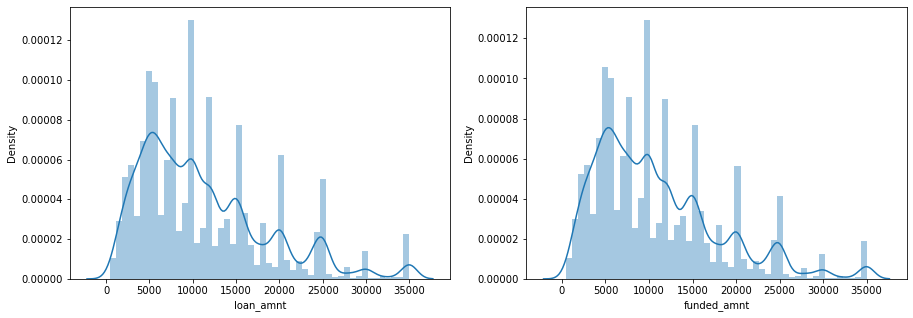

In [32]:
#As we can see from the below plots,the distribution for both the columns is similar, so we can use any 1 of these for analysis 
#Here we will be using 'loan_amnt'
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)  
sns.distplot(loan['loan_amnt'])

plt.subplot(1,2,2)  
sns.distplot(loan['funded_amnt'])

plt.show()

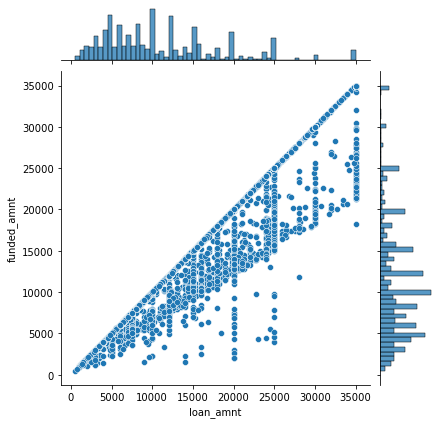

In [33]:
#The linear relationship between these two columns can also be given using the below plot
sns.jointplot(loan['loan_amnt'],loan['funded_amnt'])
plt.show()

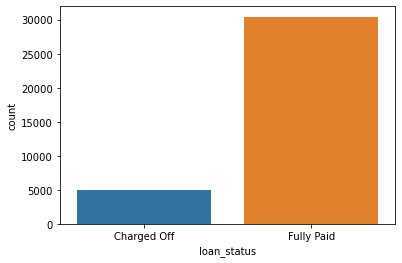

In [34]:
#Most of the borrowers have been able to fully repay their loans
sns.countplot(loan['loan_status'])
plt.show()

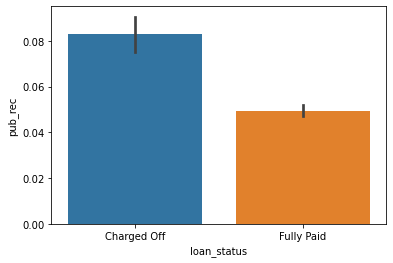

In [35]:
#Analysing few variables showing high chances for customers being Charged_off
sns.barplot(data=loan, x='loan_status', y='pub_rec')
plt.show()

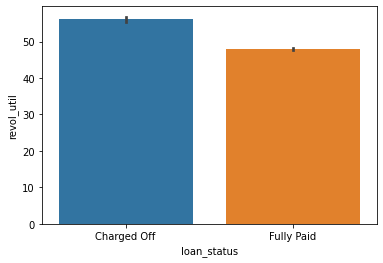

In [36]:
sns.barplot(data=loan, x='loan_status', y='revol_util')
plt.show()

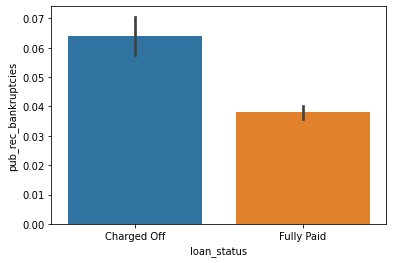

In [37]:
sns.barplot(data=loan, x='loan_status', y='pub_rec_bankruptcies')
plt.show()

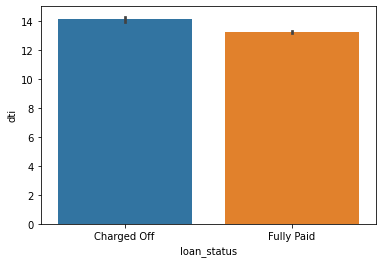

In [41]:
sns.barplot(data=loan, x='loan_status', y='dti')
plt.show()

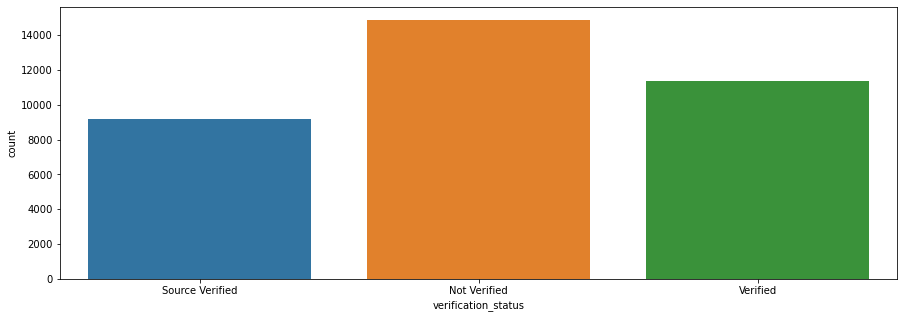

In [38]:
#The verification_status shows a high count of not being verified 
plt.figure(figsize=(15,5))
sns.countplot(loan['verification_status'])
plt.show()

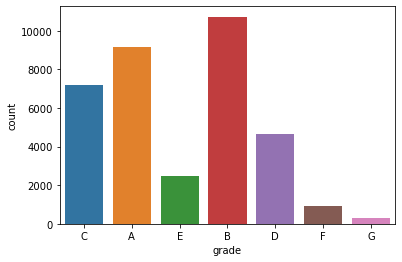

In [39]:
#Grade 'B' seems to have applied for most loans compared to other grades.
#With grade 'F' & 'G' being the lowest borrowers
sns.countplot(x='grade',data=loan)
plt.show()

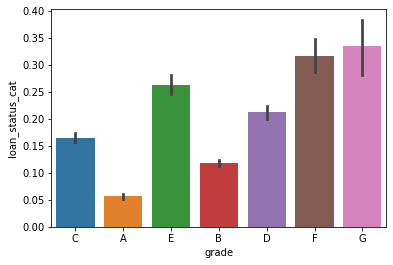

In [40]:
#Creating a category for loan_status with value '1' for Charged_off customers and '0' for Fully Paid Customers
#Grade 'F' & 'G' are the customers who have defaulted the most
loan['loan_status_cat'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
sns.barplot(x='grade', y='loan_status_cat', data=loan)
plt.show()

In [42]:
#To find loan data for a group of grades and sub-grades 
loan.groupby(['grade','sub_grade'])['loan_status_cat'].count().head(10)

grade  sub_grade
A      A1           1005
       A2           1357
       A3           1632
       A4           2662
       A5           2491
B      B1           1616
       B2           1826
       B3           2590
       B4           2253
       B5           2447
Name: loan_status_cat, dtype: int64

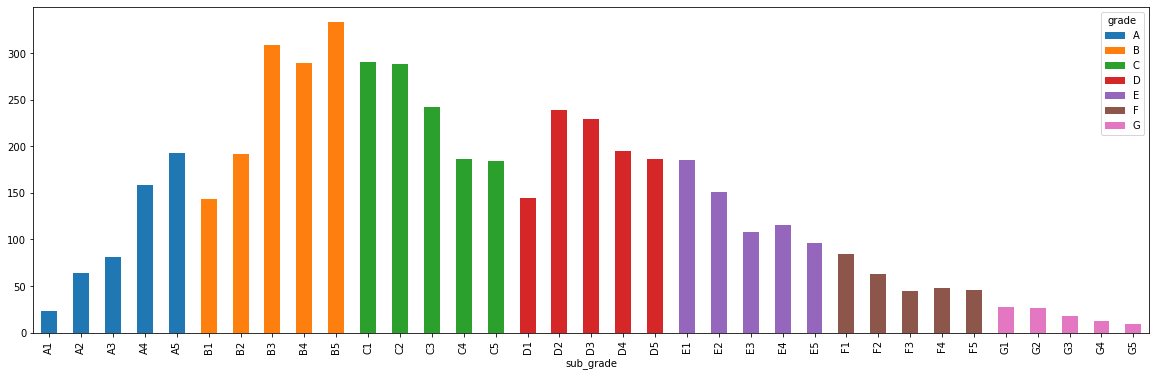

In [43]:
#Plotting a graph to show the impact of grade and subgrade on loan_status
data = pd.pivot_table(data=loan,values='loan_status_cat',index='sub_grade',columns='grade',aggfunc=sum)
data.plot(kind='bar',stacked=True,figsize=[20,6])
plt.show()

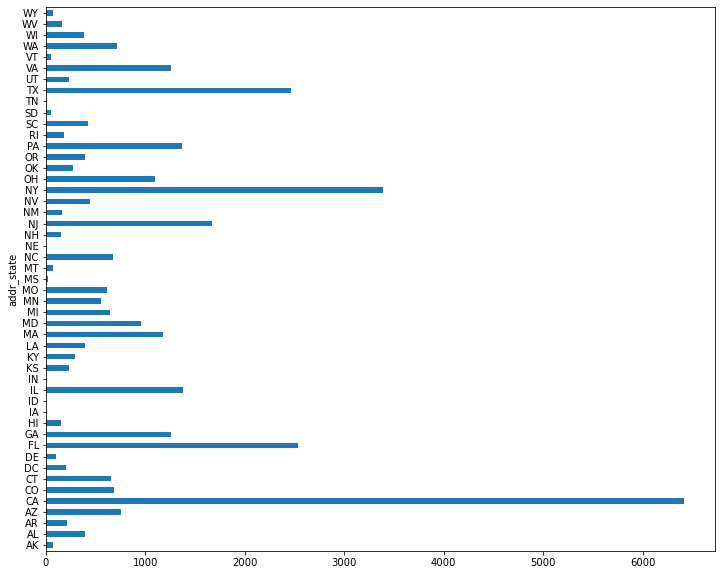

In [63]:
#From the below plot, we can find the top cities who have taken the highest number of loans
#Here the top borrowing cities being California(CA), NewYork(NY), Florida(FL) and Texas(TX)
plt.figure(figsize=(12,10))
loan.groupby('addr_state')['loan_status'].count().plot.barh()
plt.show()

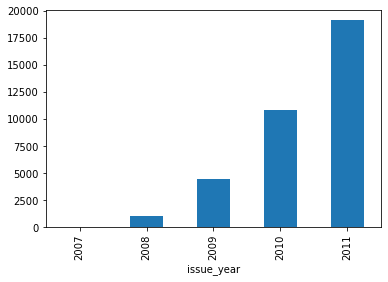

In [46]:
#The highest amount of loans were taken for the year 2011
loan.groupby('issue_year')['loan_amnt'].count().plot.bar()
plt.show()

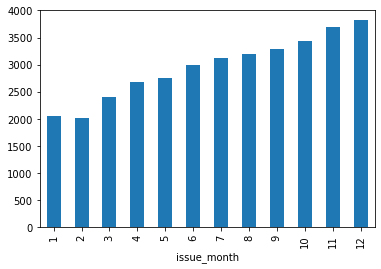

In [47]:
#Also the most loans were issued always during the end of the calendar year(Highest being for Dec, Nov & Oct)
loan.groupby('issue_month')['loan_amnt'].count().plot.bar()
plt.show()

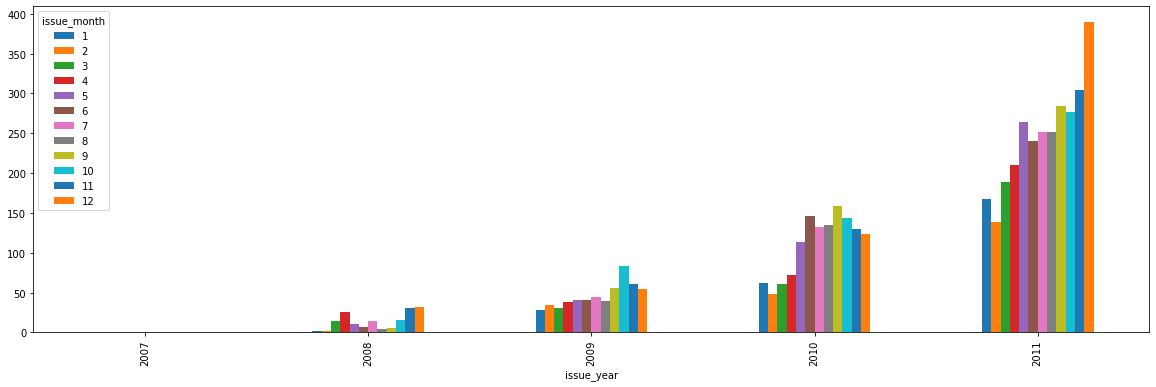

In [49]:
#Plotting a graph to show the impact of issue_year and issue_month on loan_status
data = pd.pivot_table(data=loan,values='loan_status_cat',index='issue_year',columns='issue_month',aggfunc=sum)
data.plot(kind='bar',stacked=False,figsize=[20,6])
plt.show()

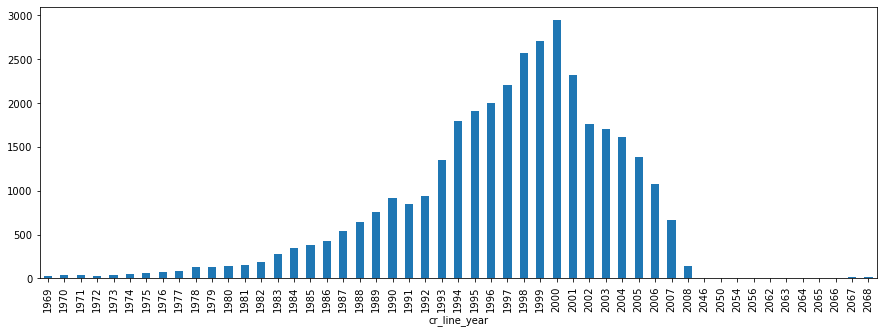

In [50]:
#In the year '2000', most customers had their credit lines opened
plt.figure(figsize=(15,5))
loan.groupby('cr_line_year')['loan_amnt'].count().plot.bar()
plt.show()

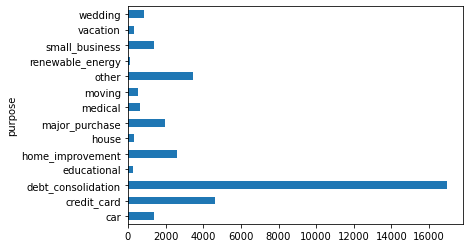

In [51]:
#Most loans were taken by customers for debt_consolidation
loan.groupby('purpose')['loan_amnt'].count().plot.barh()
plt.show()

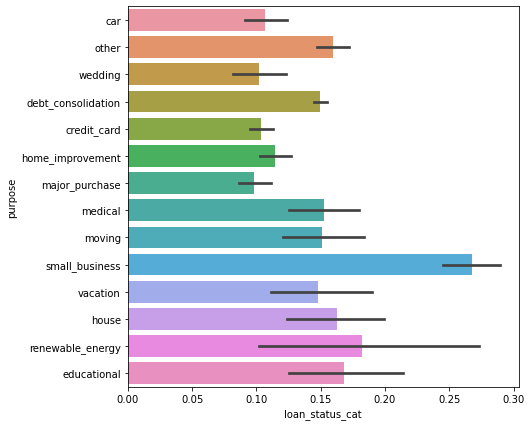

In [52]:
#Most defaulters were people who had the purpose of small business, renewable energy and education for their loans
plt.figure(figsize=(7,7))
sns.barplot(y='purpose',x='loan_status_cat',data=loan)
plt.show()

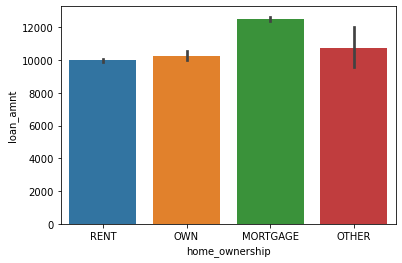

In [53]:
#The people who had mortgaged their homes paid the highest amount of loan
sns.barplot(data=loan, x='home_ownership', y='loan_amnt')
plt.show()

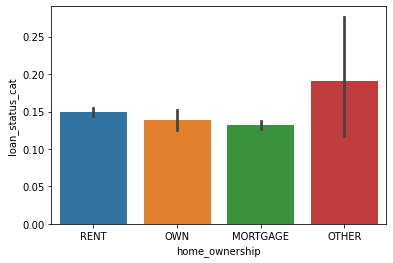

In [54]:
#The people with other home ownership options were the most charged_off ones
sns.barplot(x='home_ownership',y='loan_status_cat',data=loan)
plt.show()

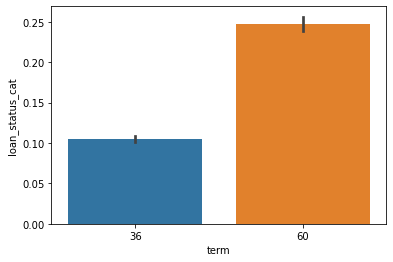

In [55]:
#The people with 60 month term period were the most charged_off ones on the basis of loan_status
sns.barplot(x='term',y='loan_status_cat',data=loan)
plt.show()

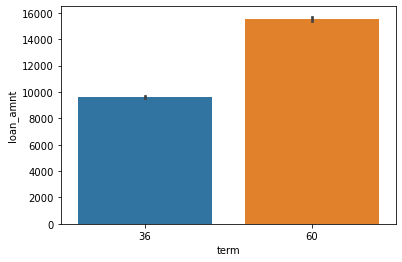

In [56]:
#The people with 60 month term period were the most charged_off ones on the basis of loan_amnt
sns.barplot(x='term',y='loan_amnt',data=loan)
plt.show()

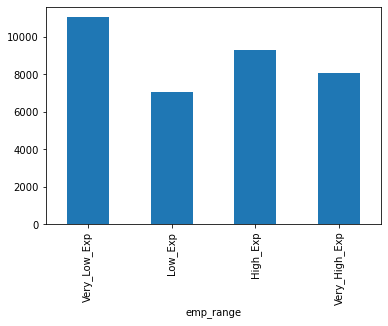

In [57]:
#People who fall in the less experienced employment category have higher tendency to be a defaulter
loan.groupby(['emp_range'])['loan_status_cat'].count().plot.bar()
plt.show()

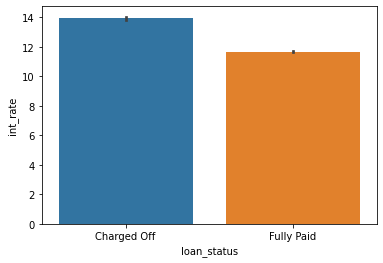

In [3]:
#The graph shows that the int_rate was more for charged_off customers
sns.barplot(x='loan_status',y='int_rate',data=loan)
plt.show()

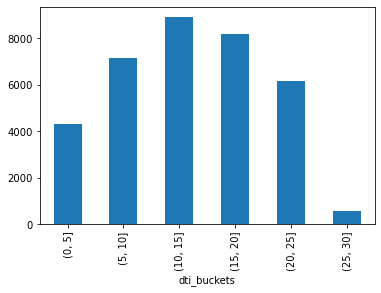

In [59]:
#Customers having a debt to income ratio between 10-15 are the most defaulters
loan.groupby(['dti_buckets'])['loan_status'].count().plot.bar()
plt.show()

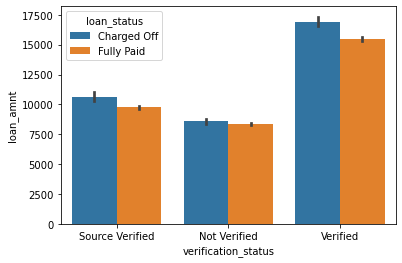

In [60]:
#loan_amnt vs verification_status vs loan_status
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

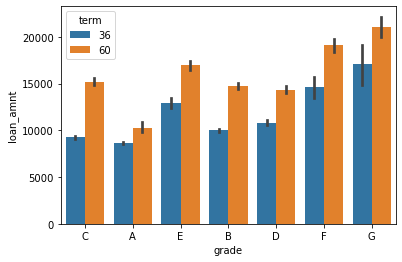

In [61]:
#loan_amount vs grade vs term
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan, estimator=np.mean)
plt.show()

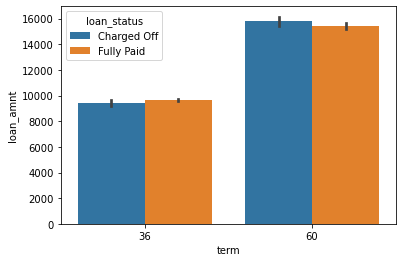

In [62]:
#loan_amount Vs term Vs loan_status
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

The Driver variables:
    
1. pub_rec: It clearly shows that if a person has a number of derogatory public records, then there is high possibility of him being charged-off.

2. grade: It shows that even if grades ‘F’ & ‘G’ were lowest loan borrowers, they were still the highest defaulters.

3. pub_rec_bankruptcies: Customers who have higher records of bankruptcies are bound to be charged-off more.

4. term: The people who have opted for a 60 months term period for their loan repayment are the highest defaulters.

5. home_ownership: Customers who don’t seem to have a fixed home ownership are likely to default more.

6. emp_length: People being a defaulter is more when they have a low employment expereince.

7. verification_status: Customers not being verified can be one reason of lending money to risky borrowers and facing credit loss.

8. revol_util: Though not much difference in the data, yet revol-util can play a key role in deciding if a customer will default or not.

9. addr_state: The top cities who have taken the highest number of loans are also the ones who have higher number of defaulters. 

10. int_rate: Customers with higher interest rates are unable to pay the overload and hence may be factor for becoming a defaulter.

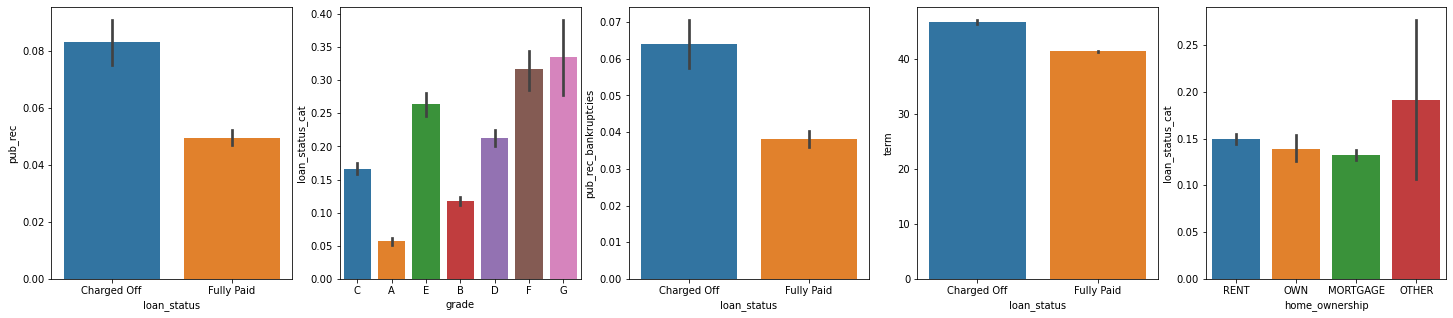

In [64]:
#Showing the top 5 strong indicator variables for a customer being Charged-Off 
plt.figure(figsize=(25,5))

plt.subplot(1,5,1)  
sns.barplot(y='pub_rec',x='loan_status',data=loan)

plt.subplot(1,5,2)  
sns.barplot(x='grade',y='loan_status_cat',data=loan)

plt.subplot(1,5,3)  
sns.barplot(y='pub_rec_bankruptcies',x='loan_status',data=loan)
             
plt.subplot(1,5,4)  
sns.barplot(y='term',x='loan_status',data=loan)
             
plt.subplot(1,5,5)  
sns.barplot(x='home_ownership',y='loan_status_cat',data=loan)       

plt.show()